In [1]:
%matplotlib inline
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random

import eight_queens

# Extras adicionados:
- O ponto de crossover passa a ser aleatório.
- A probabilidade de mutação não é fixa; varia de acordo com a razão entre a quantidade de soluções com o mesmo resultado e a quantidade de soluções totais. A diversidade foi inserida no gráfico.
- Solução ótima encontrada: **[4, 7, 5, 3, 1, 6, 8, 2]**
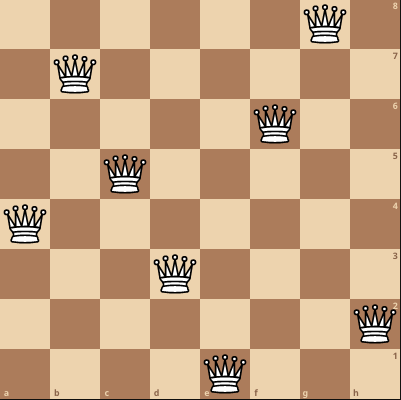

In [2]:

def run_ga(g, n, k, m, e):
    """
    Executa o algoritmo genético e retorna o indivíduo com o menor número de ataques entre rainhas
    :param g:int - numero de gerações
    :param n:int - numero de individuos
    :param k:int - numero de participantes do torneio
    :param m:float - probabilidade de mutação (entre 0 e 1, inclusive)
    :param e:int - número de indivíduos no elitismo
    :return:list - melhor individuo encontrado
    """
    def select_parent(population):
      """
        Seleciona dois individuos de uma populacao
        :param population: lista com os individuos
        :return: 2 individuos (listas de 8 elementos)
      """
      p1 = random.choice(population)
      p2 = random.choice(population)
      return p1,p2
    
    def best_worst_avg_diversity(population):
      """
        Informações para o gráfico
        Recebe uma lista de individuos e retorna seu melhor valor,pior valor, media dos valores e diversidade
        Diversidade é baseada na quantidade de individuos com a mesma quantidade de conflitos.
        :param population: lista com os individuos
        :return: quadrupla com melhor,pior, media e o grau de diversidade
      """
      diversity_list = []
      smallest, biggest, sums = float("inf"), -float("inf"), 0
      for individual in population:
        value = eight_queens.evaluate(individual)
        smallest = value if value < smallest else smallest
        biggest =  value if value > biggest else biggest
        sums += value
        diversity_list.append(value)
        
      diversity = len(set(diversity_list)) / len(population)
      return smallest,biggest,sums/len(population),diversity

    # Auxiliares
    numbers = range(1,9)
    participants = [random.choices(numbers,k=8) for _ in range(n)]
    graph_data= []
    diversity_list= []
    
    # Algorítmo Genético
    for _ in range(g):
      graph_data.append(best_worst_avg_diversity(participants))
      # Taxa de mutação baseada no valor de diversidade, mas não pode ser maior que MAX ou menor que MIN
      mr = max(MIN_MUTATION_RATE, min(MAX_MUTATION_RATE, 1 - graph_data[-1][3]))
        
      p = []
      while len(p) < e:
        p.append(eight_queens.tournament(participants))
        p1, p2 = select_parent(p)
        o1,o2 = eight_queens.crossover(p1,p2,random.randint(1,8))
        o1 = eight_queens.mutate(o1,mr); o2 = eight_queens.mutate(o2,mr)
        p.append(o1);p.append(o2)

      participants += p


    return eight_queens.tournament(participants), graph_data
#best, graph_data = run_ga(100, 60, 20, 0.2, 10)


In [3]:
# AJUSTAR PARAMETROS

"""
    :param g:int - numero de gerações: alto pra permitir convergencia
    :param n:int - numero de individuos: n: search space
    :param k:int - numero de participantes do torneio
    :param m:float - probabilidade de mutação (entre 0 e 1, inclusive):impede convergencia prematura mas atrasa a convergencia. implementei uma adaptativa
    :param e:int - número de indivíduos no elitismo: e: baixo pra evitar perda de boas solucoes
    :return:list - melhor individuo encontrado

    """
MIN_MUTATION_RATE = 0.1
MAX_MUTATION_RATE = 0.5


In [4]:
values = []
bestValue = 0
for _ in range(50):
  best, graph_data = run_ga(40, 10, 4, 0.00, 2)
  if not eight_queens.evaluate(best):
    print("Solução ótima encontrada: ", best)
    bestValue = best
    results = graph_data
  values.append(eight_queens.evaluate(best))
media = np.array(values)
media = np.sum(values) / len(values)

Solução ótima encontrada:  [3, 8, 4, 7, 1, 6, 2, 5]
Solução ótima encontrada:  [4, 7, 5, 3, 1, 6, 8, 2]


[4, 7, 5, 3, 1, 6, 8, 2]


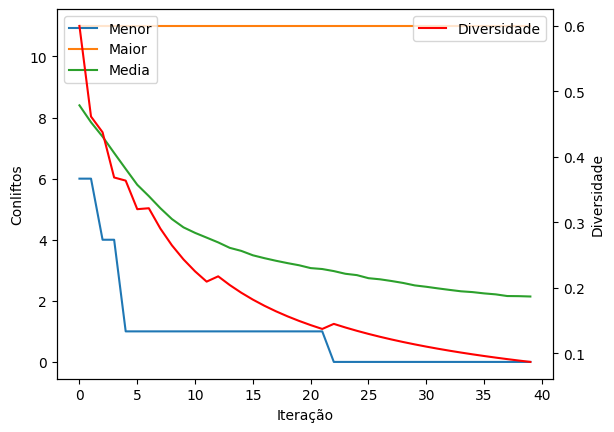

In [5]:
x = range(len(graph_data))
graph_data = results
menor = [a[0] for a in graph_data]
maior = [a[1] for a in graph_data]
media = [a[2] for a in graph_data]
diver =[a[3] for a in graph_data]
fig, ax1 = plt.subplots()


# MMM
ax1.set_ylabel('Conliftos')
ax1.plot(x, menor, label='Menor')
ax1.plot(x, maior, label='Maior')
ax1.plot(x, media, label='Media')

# Diversidade
ax2 = ax1.twinx()
ax2.plot(x, diver, label='Diversidade',color='red')

# Set the label for the secondary y-axis
ax2.set_ylabel('Diversidade')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')


# Set the x-axis label
ax1.set_xlabel('Iteração')



# Display the plot
print(bestValue)
plt.show()